In [1]:
# load iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
print(iris.data.shape, iris.target.shape) # iris data and labels
print(iris.target_names) # names of labels
print(iris.feature_names) # names of attributes

(150, 4) (150,)
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


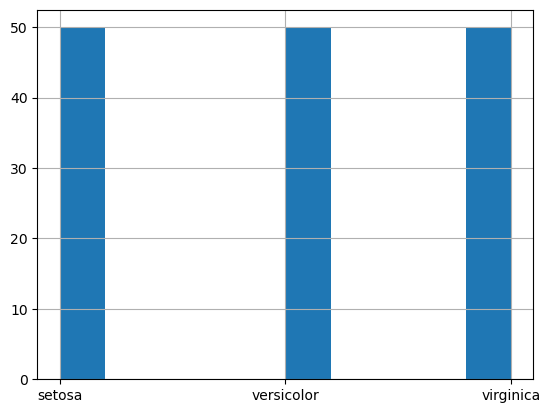

In [3]:
# plot group distribution
import pandas as pd
import matplotlib.pyplot as plt
target_str = pd.Series(iris.target).apply(lambda i: iris.target_names[i])
ax = target_str.hist()

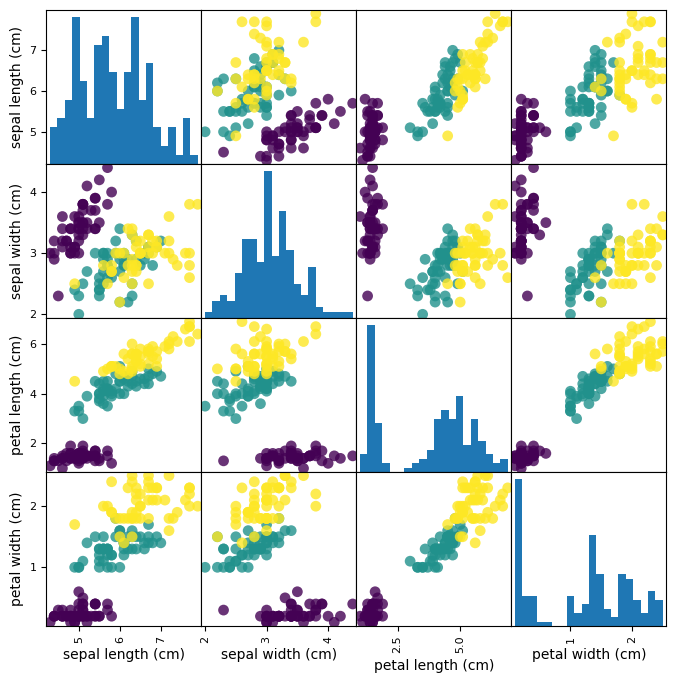

In [4]:
# iris as data frame
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
# create a scatter matrix from the dataframe, color by target
ax = pd.plotting.scatter_matrix(iris_df, c=iris.target, marker='o', figsize=(8,8), hist_kwds={'bins': 20}, s=60, alpha=.8)

In [5]:
#Train-test split

In [6]:
#The dataset is split onto train and test sets in ratio 75:25.

In [7]:
#Train set is used for training.
#Test set is used for estimation of model performance to find out, whether model generalizes well.

In [8]:
# train test split
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(iris.data, iris.target, train_size=.75, random_state=12345)
print(xtrain.shape, ytrain.shape) # dimension of train set
print(xtest.shape, ytest.shape) # dimension of test set

(112, 4) (112,)
(38, 4) (38,)


In [9]:
#kNN model

In [10]:
#Intuitively the idea of the kNN (k-nearest neighbors) model is
#Majority of the most similar samples are class A, so the sample is also class A.

In [11]:
#Train the model
#We define kNN classifier with class KNeighborsClassifier , hyperparameter n_neighbors value is 5.

In [12]:
# create a knn, k = 5
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [13]:
#For training the model only train set is used.

In [17]:
# fit to the train set
knn.fit(xtrain, ytrain);

In [18]:
#Predict

In [19]:
ytrain_pred = knn.predict(xtrain) # predict on train set
ytest_pred = knn.predict(xtest) # predict on test set

In [20]:
#Evaluation 

In [21]:
#Comparison of predicted and true label can tell us valuable information about how well our model performs.
#The simplest performance statistic is the ratio of correct predictions, called accuracy .

In [22]:
#accuracy = #correct predictions/ #predictions

In [23]:
#The complement of accuracy is misclassification.

In [24]:
#misclassification =1−accuracy=#incorrect predictions/#predictions

In [25]:
# accuracy
acc_train = (ytrain == ytrain_pred).mean()
acc_test = (ytest == ytest_pred).mean()
print(f"Train set: {acc_train}")
print(f"Test set: {acc_test}")

Train set: 0.9642857142857143
Test set: 0.9736842105263158


In [26]:
#The accuracy of the classifier on the train set should be the same or a bit better than on the test set.
#If the test accuracy is much worse, we are overfitting the model and have to change parameters. In kNN,
#the value of n_neighbors is the key to achieve the best results, more about it in the section Hyperparameter
#tuning .

In [27]:
#To evaluate, whether our model performs well, its performance is compared to other models. We usually start with
#dummy models.

In [28]:
#Most frequent model always predicts the label that occur the most in our dataset. If the dataset is balanced such
#as iris , we choose one of the classes.

In [29]:
# most frequent model
import numpy as np
ytest_most_frequent_pred = np.zeros(iris.target.shape[0])
acc_most_frequent = (iris.target == ytest_most_frequent_pred).mean()
print(f"Most frequent accuracy: {acc_most_frequent}")

Most frequent accuracy: 0.3333333333333333


In [30]:
#Stratified model assigns random label based on ratio of the labels in the dataset. In case of iris ,
#the probabilities of each species are equal.

In [31]:
# stratified model
ytest_stratified_pred = np.random.randint(0,3,iris.target.shape[0])
acc_stratified = (iris.target == ytest_stratified_pred).mean()
print(f"Stratified accuracy: {acc_most_frequent}")

Stratified accuracy: 0.3333333333333333


In [32]:
#Accuracy of kNN is thus much better compared to these naive classifiers. We could now continue with comparison
#with other machine learning classification models.

In [33]:
#More complex method to evaluate the performance of a classifier is constructing a confusion matrix , 
#that shows not only accuracies for each of the classes (labels), but what classes is the classifier most confused
#about.

In [34]:
# confusion matrix for train set
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
cM_train = confusion_matrix(ytrain, ytrain_pred)
cM_train

array([[37,  0,  0],
       [ 0, 34,  2],
       [ 0,  2, 37]])

In [35]:
#On the train set, two samples of versicolor were classified as virginica and two samples of virginica as
#versicolor. All the setosa samples were classified correctly.

In [36]:
#The accuracy of the prediction can be derived from the confusion matrix as sum of the matrix diagonal over
#sum of whole matrix.

In [37]:
# train set accuracy from confusion matrix
np.diag(cM_train).sum() / cM_train.sum()

0.9642857142857143

In [38]:
#Confusion matrix can be used to get other interesting statistics about the prediction, such as sensitivity or
#true positive rate (TPR), specificity or true negative rate (TNR), positive predictive value (PPV) and 
#negative predictive value (NPV).

In [39]:
#We can also visualize confusion matrix in form of heatmap.

/opt/anaconda3/envs/DL/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


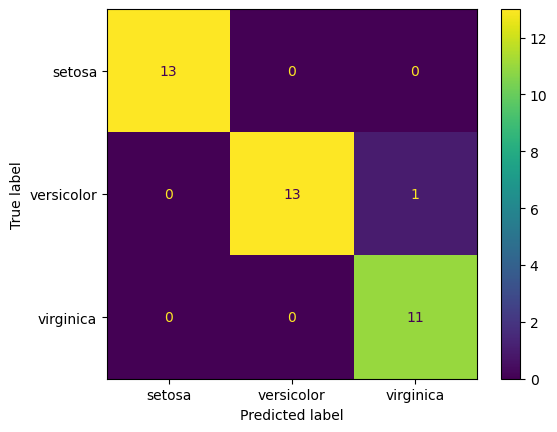

In [40]:
# plot test set confusion matrix as heatmap
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(knn, xtest, ytest, display_labels=iris.target_names);

In [41]:
#On the test set, classifier worked flawlessly on setosas and virginicas. One versicolor sample was mistakenly
#classified as virginica.

In [42]:
#Hyperparameter tuning

In [43]:
#Hyperparameters are parameters of the model, that are not subject of model training. As they have significant 
#impact on the model prediction, we want to set them to the best value possible to maximize the prediction
#success of the model. For kNN the hyperparameter is the number of neighbors used for prediction, n_neighbors .

In [44]:
#We can find hyperparameters in many other machine learning models such as k-means (number of clusters k ),
#Elastic net (regularization λ1 and λ2) or neural networks (structure of network, used activation functions,
#dropout probabilities, number of epochs, batch size, ...).

In [45]:
#We start by creating a new model without specifying the hyperparameter value.

In [46]:
# create a knn
from sklearn.neighbors import KNeighborsClassifier
knn2 = KNeighborsClassifier()

In [47]:
#The procedure to optimize the hyperparameter value is based on a simple algorithm:

In [48]:
#Choose a value .
#Evaluate the objective function .
#If it is better than the best seen so far, remember this point instead.

In [49]:
#The two configurable parts of this procedure are strategy for choosing a value and objective function.
#Two strategies that we will compare are random choice and grid searching , but there is many other heuristics
#such as hillclimbing, genetic algorithms or particle swarm. Neither of the two presented strategies guarrantee
#to return the optimal value though.

In [50]:
#Objective function is a way to score, how good each value is and to compare two hyperparameter values.
#In our case, we will use accuracy of the model prediction.

In [51]:
#To maintain independence of test set, it can not be used for optimization of the hyperparameters. We will split
#the training data into two parts, where one is still called train set and the other is validation set and we use
#it to calculate the accuracy over different n_neighbors values on a model trained with train set.
#This split is done inside sklearn automatically.

In [52]:
#Randomized search means random choosing of the n_neighbors value. We specify the domain of the parameter
#and the number of iterations.

In [53]:
# tune hyperparameter k
from sklearn.model_selection import RandomizedSearchCV
distributions = dict(n_neighbors=list(range(1,50)))
clf = RandomizedSearchCV(knn2, distributions, random_state=0, n_iter = 10)
# run
search = clf.fit(xtrain, ytrain)
search.best_params_['n_neighbors']

5

In [54]:
#The best configuration of hyperparameter n_neighbors acquired with randomized search is 5.

In [55]:
#Grid search means we are looking for the n_neighbors value in a regular grid over the domain of the objective
#function. For the grid search we have to specify the grid.

In [56]:
# tune hyperparameter k
from sklearn.model_selection import GridSearchCV
parameters = dict(n_neighbors=list(range(1,50)))
clf2 = GridSearchCV(knn2, parameters)
# run
search2 = clf2.fit(xtrain, ytrain)
search2.best_params_['n_neighbors']

3

In [57]:
#The best configuration of hyperparameter n_neighbors acquired with grid search is 3.

In [58]:
# classify with k = 3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain, ytrain)
# predict train and test
ytrain_pred = knn.predict(xtrain)
ytest_pred = knn.predict(xtest)
# accuracies
print((ytrain_pred == ytrain).mean())
print((ytest_pred == ytest).mean())

0.9642857142857143
0.9736842105263158


In [59]:
#The accuracy for n_neighbors 3 and 5 is identical.

In [60]:
#It is also possible to make a plot of objective function over the hyperparameter n_neighbors for the
#misclassifications on train and test sets, which gives us a better insight, whether the parameter values
#returned by the strategies seem to be the optimal ones.

In [61]:
# accuracy on train and test sets over parameter values
acc_train,acc_test = [],[]
for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain, ytrain)
    acc_train.append((ytrain != knn.predict(xtrain)).mean())
    acc_test.append((ytest != knn.predict(xtest)).mean())

In [62]:
#We can see that as n_neighbors grows, train set misclassification grows. As for test classification, 
#for 1-4 it goes down, then it stays the same and after 40 it starts growing. Hyperparameter value 1 means the
#model is overfitted, if we set too high value (> 20), the model is getting underfitted. Both of the strategies
#returned reasonable value.

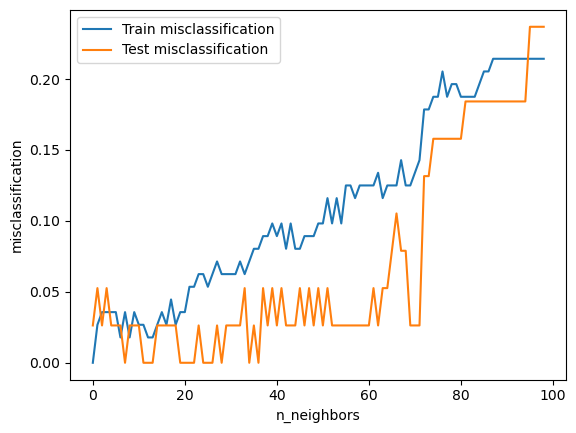

In [63]:
# plot accuracies over n_neighbors
plt.plot(acc_train, label='Train misclassification')
plt.plot(acc_test, label='Test misclassification')
plt.legend()
plt.xlabel("n_neighbors")
plt.ylabel("misclassification");

In [ ]:
#The best accuracy achieved was 97.37 % on test data and 96.43 % on train data for n_neighbors 3 or 5.